In [43]:
import pandas as pd
from pathlib import Path

# Read the data
data_path = Path.cwd().parent / "assets" / "datasets" / "raw" / "Perfiles_iniciales_de_consumo_y_demanda_de_referencia_2023.csv"

df = pd.read_csv(data_path, sep=";", decimal=".", thousands=",", index_col=0)

In [44]:
df.head()

,Día,Hora,"P2.0TD,0m,d,h","P3.0TD,0m,d,h","P3.0TDVE,0m,d,h",Demanda de Referencia 2023 (MW)
Mes,,,,,,
1,1,1,0.000136,0.000086,0.000084,25418
1,1,2,0.000116,0.000081,0.000066,23582
1,1,3,0.000100,0.000078,0.000050,22153
1,1,4,0.000091,0.000077,0.000047,21272
1,1,5,0.000085,0.000077,0.000058,20844


In [45]:
# reset index
df.reset_index(inplace=True)

In [46]:
# rename columns
col_mapping = {
    "Mes": "month",
    "Día": "day",
    "Hora": "hour",
    "P2.0TD,0m,d,h": "p20td",
    "P3.0TD,0m,d,h": "p30td",
    "P3.0TDVE,0m,d,h": "p30tdve",
    "Demanda de Referencia 2023 (MW)": "ref_demand_2023_mw",
}

# rename columns
df.rename(columns=col_mapping, inplace=True)

In [47]:
# build datetime column
df['_timestamp'] = df[['month', 'day', 'hour']].apply(lambda x: f"2023-{x[0]:02d}-{x[1]:02d} 00:00:00", axis=1)

In [64]:
# convert to datetime
df['timestamp'] = pd.to_datetime(df['_timestamp'], format="%Y-%m-%d %H:%M:%S")

# add number of hours column
df['timestamp'] = df['timestamp'] + pd.to_timedelta(df['hour'], unit='h')

In [67]:
# assuming hour 24 is last hour of the day and lands on 00:00:00 of the next day
df.head()

,month,day,hour,p20td,p30td,p30tdve,ref_demand_2023_mw,_timestamp,timestamp
0,1,1,1,0.000136,0.000086,0.000084,25418,2023-01-01 00:00:00,2023-01-01 01:00:00
1,1,1,2,0.000116,0.000081,0.000066,23582,2023-01-01 00:00:00,2023-01-01 02:00:00
2,1,1,3,0.000100,0.000078,0.000050,22153,2023-01-01 00:00:00,2023-01-01 03:00:00
3,1,1,4,0.000091,0.000077,0.000047,21272,2023-01-01 00:00:00,2023-01-01 04:00:00
4,1,1,5,0.000085,0.000077,0.000058,20844,2023-01-01 00:00:00,2023-01-01 05:00:00


In [68]:
import seaborn as sns

<Axes: xlabel='timestamp', ylabel='value'>

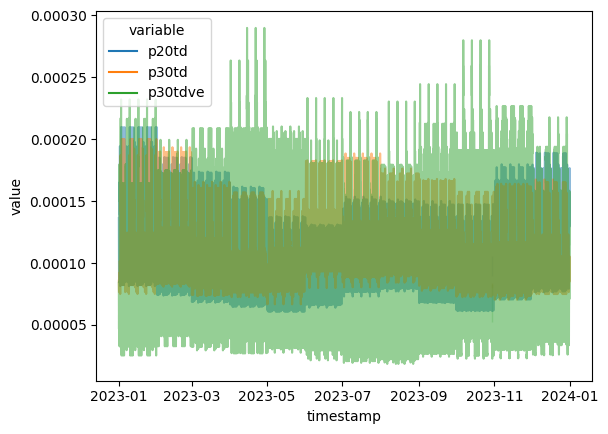

In [74]:
# plot everything
sns.lineplot(data=df.melt(id_vars=['timestamp'], value_vars=['p20td', 'p30td', 'p30tdve']), x="timestamp", y="value", hue="variable", alpha=0.5)

In [78]:
# save to csv
df.drop(columns=['_timestamp', 'month', 'day', 'hour']).to_csv(Path.cwd().parent / "assets" / "datasets" / "processed" / "ree-demand-profiles.csv", index=False)

# save to feather
df.drop(columns=['_timestamp', 'month', 'day', 'hour']).to_feather(Path.cwd().parent / "assets" / "datasets" / "processed" / "ree-demand-profiles.feather")